In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import *
import json
import os
import pdb
import re

In [2]:

def get_data(file_path):
    output = []
    with open(file_path,'r') as f:
        for line in f.readlines():
            k = []
            line = line.split('\t')
            for j in line:
                k.append(float(j.split('/')[1]))
            output.append(k)
    return np.asarray(output).T

def line_chart(models, data_matrix, x_label, y_label, title, xpoints, higher_models = [], name=None, maxx=1.2):
    styles = ['o', 's', 'd', '^','x', '*', 'v', '<']
    #styles = ['o', 's', 'v', '*']
    line_styles = ['-', '--', '-', '-.', ':','-','--']
    # styles = ['o-', '>--', 's-', 'd-.', '^:', 'x-', '*-', 'v-']
    
    colors = ['#003300', '#009933', '#33cc33', '#66ff66', '#99ff99', '#ffffff','#0033ff']
    barwith = 0.1
    ax1 = plt.subplot(111)

    num_models = data_matrix.shape[0]
    num_x_levels = data_matrix.shape[1]\
        
    assert num_models == len(models), "Number of model must equal to data matrix shape 0"


    lns1 = []
    for i, model in enumerate(models):
        if model not in higher_models:
            line = data_matrix[i]
            x = np.arange(num_x_levels)
            fillstyle = 'none'
            if i > 3:
                fillstyle = 'full'
            lni, = ax1.plot(x, line, marker=styles[i % len(styles)], markersize=8, color='k', label=models[i], markevery=1, fillstyle=fillstyle)
            lns1.append(lni)

    ax1.set_xlabel(x_label, fontsize = 15,fontweight='bold')
    ax1.set_ylabel(y_label, fontsize = 15,fontweight='bold')


    plt.xticks(np.arange(len(xpoints)), xpoints, fontsize = 16)
#     plt.yticks(np.arange(0, 1.1, step=0.2), fontsize = 16)
    ax1.set_xlim(-0.3, len(xpoints) + .3 - 1)
    ax1.set_ylim(-0.05, maxx + .32)
    # ypoints = np.arange(0, 1.1, 0.2)
    # plt.yticks(np.arange(len(ypoints)), ypoints, fontsize = 16)

    ax1.grid(True)
    box = ax1.get_position()
    ax1.set_position([box.x0 + 0.02, box.y0 + 0.04, box.width, box.height])

    # plt.legend(ncol = 4,borderaxespad = 0.3, fontsize=10.7)
    plt.legend(ncol = 4, fontsize = 11.5, loc = 1, columnspacing = 3.22)
    plt.show()
#     plt.savefig(name)
#     plt.close()

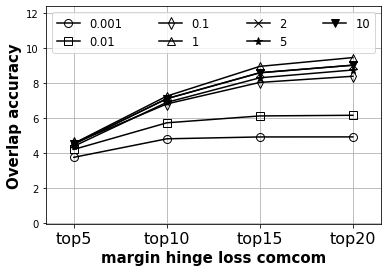

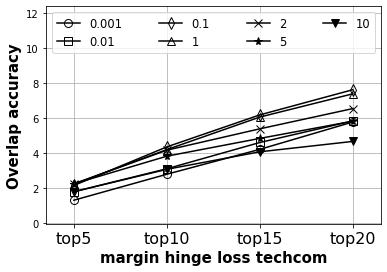

In [60]:

# if __name__ == "__main__":
models = ['0.001','0.01','0.1','1','2','5','10']
xpoint_del_nodes = {"xp": ["top5", "top10", "top15", "top20"], "xlabel": "Train ratio"}
ylabel = "Overlap accuracy"
maxx = 12.05

file_names = ['data/margin_hinge_loss_comcom','data/margin_hinge_loss_techcom']
for index, file_name in enumerate(file_names):
    accs = get_data(file_name)
    xticks = ["top5", "top10", "top15", "top20"]
    if index == 0:
        xlabel = 'margin hinge loss comcom'
    else:
        xlabel = 'margin hinge loss techcom'
    line_chart(models = models, data_matrix=accs, \
        x_label=xlabel, y_label=ylabel, title=name, xpoints=xticks, higher_models=[], name='{}.png'.format(file_name), maxx=maxx)


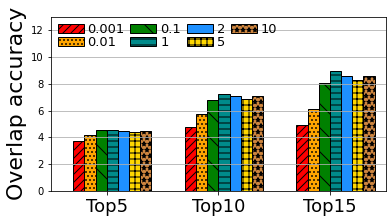

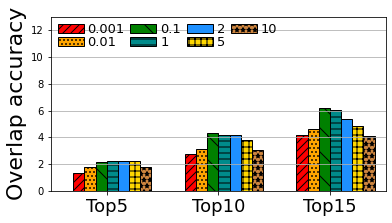

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import math

def get_data(file_path):
    output = []
    with open(file_path,'r') as f:
        for line in f.readlines():
            k = []
            line = line.split('\t')
            for j in line:
                k.append(float(j.split('/')[1]))
            output.append(k)
    return np.asarray(output)[:-1].T

file_names = ['data/margin_hinge_loss_comcom','data/margin_hinge_loss_techcom']
# x7 = [1.3,2.3,3.3]
x8 =[ 1.35,2.35,3.35]
x7 = [ 1.25,2.25,3.25]
x6 = [ 1.15,2.15,3.15]
x5 = [1.05,2.05,3.05]
x4 = [ 0.95,1.95,2.95]
x3 = [ 0.85,1.85,2.85]
x2 =  [ 0.75,1.75,2.75]
# x =  [ 0.65,1.65,2.65]

#if param.language == 'all':
# y1 = [652,5647,20959] 
# y2 = [26,336,62] 
# y3 = [68,1680,5228] 
# y4 = [14,76,422]
# y5 = [25,323,1876]
# y6 = [198,353,2624]
# y7 = [389,7538,23095]
# y8 = [10,50,200]
for index, file_name in enumerate(file_names):
    y = get_data(file_name)
    xticks = ["top5", "top10", "top15", "top20"]
    if index == 0:
        xlabel = 'margin hinge loss comcom'
    else:
        xlabel = 'margin hinge loss techcom'

    ax = plt.subplot(111)
    # b1 = ax.bar(x, y1,width=0.1,color='black', align='center',  hatch="",edgecolor='#000000')
    b2 = ax.bar(x2, y[0],width=0.1,color = 'red', align='center',  hatch="///",edgecolor='#000000')
    b3 = ax.bar(x3, y[1],width=0.1,color = 'orange', align='center',  hatch="...",edgecolor='#000000')
    b4 = ax.bar(x4, y[2],width=0.1,color = 'green', align='center',  hatch="\\",edgecolor='#000000')
    b5 = ax.bar(x5, y[3],width=0.1,color = 'darkcyan', align='center',  hatch="--",edgecolor='#000000')
    b6 = ax.bar(x6, y[4],width=0.1,color = 'dodgerblue', align='center',  hatch="",edgecolor='#000000')
    b7 = ax.bar(x7, y[5],width=0.1,color = 'gold', align='center',  hatch="++",edgecolor='#000000')
    b8 = ax.bar(x8, y[6],width=0.1,color = 'peru', align='center',  hatch="**",edgecolor='#000000')

    ax.set_ylabel('Overlap accuracy',fontsize=22)
    plt.xticks([ 1,2,3], ["Top5", "Top10", "Top15"], fontsize = 18)
    ax.set_xlim(0.5,3.5)
    # yticks(fontsize=22);
#     ax.set_yscale('log')
#     plt.yticks([1,10,100,1000,10000,100000],fontsize=18)
    ax.set_ylim(0,13)

    plt.gca().yaxis.grid(True)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height*0.8])
    ax.legend( (b2, b3,b4,b5,b6, b7, b8), ('0.001','0.01','0.1','1','2','5','10'), fontsize=13, frameon=False, labelspacing=0, borderpad = 0.01,
               columnspacing= 0.45, handletextpad=0.3, ncol=4, loc='upper left')
    # dir = "./chart_output/"
    plt.show()
#     savefig("NAME_Time.png", bbox_inches='tight')
